Accuracy: 0.9539421853221017
Precision: 0.838684619368203
Recall: 0.9594194312796208
F1 Score: 0.8949986184028738
Confusion Matrix:
[[12502   623]
 [  137  3239]]


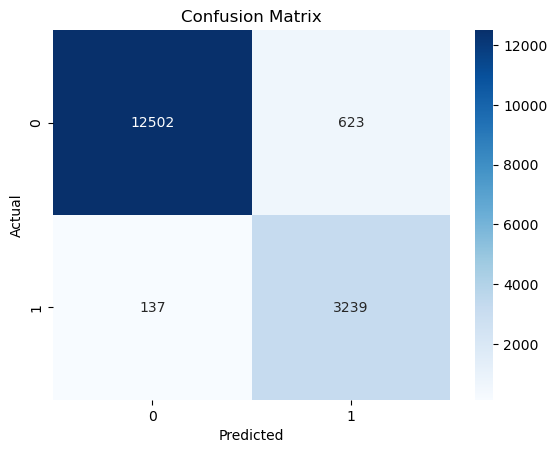

In [7]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_excel('/u1/mdr614/On the compleness of review comments/Notebook_on the compleness/BERT_CONFU_AUTHOR/test_bert_author.xlsx')

# Extract the 'prediction_Bert' and 'actual' columns
predictions = df['prediction']
actual = df['actual']

# Calculate metrics
accuracy = accuracy_score(actual, predictions)
precision = precision_score(actual, predictions)
recall = recall_score(actual, predictions)
f1 = f1_score(actual, predictions)

# Create a confusion matrix
confusion = confusion_matrix(actual, predictions)

# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

# Create a fancy confusion matrix heatmap
class_names = ['0', '1']  # Replace with your class labels
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [8]:
import pandas as pd


# Calculate metrics for "MModel" predictions
actual_values = df['actual']
mmodel_predictions = df['prediction']


# Calculate TP, TN, FP, FN for "MModel" predictions
mmodel_tp = sum((actual_values == 1) & (mmodel_predictions == 1))
mmodel_tn = sum((actual_values == 0) & (mmodel_predictions == 0))
mmodel_fp = sum((actual_values == 0) & (mmodel_predictions == 1))
mmodel_fn = sum((actual_values == 1) & (mmodel_predictions == 0))



# Calculate the number of positive and negative instances in the "actual" column
num_positive_actual = sum(actual_values == 1)
num_negative_actual = sum(actual_values == 0)

print("Number of Positive Instances in Actual:", num_positive_actual)
print("Number of Negative Instances in Actual:", num_negative_actual)

# Print the results for MModel
print("\nMetrics for MModel:")
print("True Positives:", mmodel_tp)
print("True Negatives:", mmodel_tn)
print("False Positives:", mmodel_fp)
print("False Negatives:", mmodel_fn)


Number of Positive Instances in Actual: 3376
Number of Negative Instances in Actual: 13125

Metrics for MModel:
True Positives: 3239
True Negatives: 12502
False Positives: 623
False Negatives: 137


In [9]:
# Calculate precision, recall, specificity, and F1-score for binary classification
def calculate_metrics(tp, tn, fp, fn):
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return precision, recall, specificity, f1_score

# Calculate metrics for "MModel" predictions
mmodel_precision, mmodel_recall, mmodel_specificity, mmodel_f1 = calculate_metrics(mmodel_tp, mmodel_tn, mmodel_fp, mmodel_fn)


# Print the results for MModel
print("Metrics for MModel:")
print("Precision:", mmodel_precision)
print("Recall:", mmodel_recall)
print("Specificity:", mmodel_specificity)
print("F1-Score:", mmodel_f1)



Metrics for MModel:
Precision: 0.838684619368203
Recall: 0.9594194312796208
Specificity: 0.9525333333333333
F1-Score: 0.8949986184028738


In [10]:
# Find the rows where y_pred and y_true are not equal
mismatch_rows = df[predictions != actual]

# Display the row indices where there is a mismatch
mismatch_indices = mismatch_rows.index
print(len(mismatch_rows))
print(f'Rows where predictions and actual labels do not match:\n{mismatch_indices.tolist()}')

760
Rows where predictions and actual labels do not match:
[115, 169, 175, 258, 292, 293, 299, 407, 433, 452, 503, 517, 522, 593, 644, 650, 700, 809, 845, 881, 894, 895, 952, 1017, 1021, 1047, 1075, 1117, 1164, 1228, 1251, 1252, 1255, 1263, 1289, 1350, 1379, 1381, 1386, 1392, 1411, 1417, 1535, 1552, 1586, 1764, 1769, 1779, 1789, 1809, 1833, 1846, 1850, 1859, 1868, 1872, 1874, 1905, 1910, 2040, 2046, 2076, 2117, 2159, 2217, 2276, 2307, 2308, 2321, 2326, 2337, 2355, 2426, 2428, 2481, 2506, 2518, 2522, 2523, 2529, 2541, 2545, 2565, 2571, 2577, 2585, 2592, 2612, 2613, 2620, 2674, 2695, 2697, 2725, 2728, 2771, 2788, 2871, 2994, 3010, 3018, 3042, 3107, 3235, 3258, 3259, 3297, 3315, 3335, 3343, 3369, 3385, 3425, 3431, 3438, 3498, 3523, 3614, 3635, 3641, 3653, 3658, 3712, 3713, 3716, 3724, 3730, 3741, 3759, 3766, 3791, 3925, 3977, 3988, 4016, 4029, 4136, 4150, 4172, 4175, 4180, 4228, 4258, 4293, 4313, 4332, 4334, 4363, 4379, 4403, 4415, 4424, 4432, 4441, 4457, 4533, 4536, 4560, 4562, 4563, 456

In [81]:
import os
import pandas as pd

# Folder containing the CSV files
folder_path = 'RAW_Comments_others'

# Initialize counters
total_files = 0
overall_distinct_pull_numbers = set()
total_rows_all_files = 0

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith("_ChangeRequestComments.csv"):
        total_files += 1
        # Full path to the file
        file_path = os.path.join(folder_path, filename)
        print(file_path[20:-26])
        
        # Load the CSV file
        df = pd.read_csv(file_path)
        
        # Count all rows in the current file
        total_rows = len(df)
        total_rows_all_files += total_rows
        
        # Get distinct pullNumber values
        distinct_pull_numbers = set(df['Pull'].unique())
        
        # Print the file name, distinct pullNumber count, and total rows
        #print(f'File: {filename}, Total rows: {total_rows}, Distinct pullNumber values: {len(distinct_pull_numbers)}')
        
        # Add the distinct pullNumber values to the overall set
        overall_distinct_pull_numbers.update(distinct_pull_numbers)

# Print the total number of files processed, total distinct pullNumbers, and total rows across all files
# print(f'\nTotal files processed: {total_files}')
# print(f'Total distinct pullNumber values across all files: {len(overall_distinct_pull_numbers)}')
# print(f'Total rows across all files: {total_rows_all_files}')


webpack_webpack
electron_electron
ethereum_solidity
jenkinsci_jenkins
mrdoob_three.js
ray-project_ray
scikit-learn_scikit-learn
facebook_react
clickhouse_clickhouse
vercel_next.js
lightning-ai_lightning
facebook_rocksdb
bazelbuild_bazel
grpc_grpc
numpy_numpy
freqtrade_freqtrade
pytorch_pytorch
prettier_prettier
opencv_opencv
keras-team_keras
huggingface_transformers
paddlepaddle_paddle
tryghost_ghost
pandas-dev_pandas
godotengine_godot
commaai_openpilot
taichi-dev_taichi
bitcoin_bitcoin
gatsbyjs_gatsby
twbs_bootstrap
tensorflow_tensorflow
facebook_react-native
cypress-io_cypress
protocolbuffers_protobuf
jumpserver_jumpserver
apache_airflow
nodejs_node
apache_mxnet
apache_incubator-mxnet
langchain-ai_langchain
spring-projects_spring-boot
google_jax
getsentry_sentry
envoyproxy_envoy
serverless_serverless
mozilla_pdf.js
elastic_elasticsearch
home-assistant_core
ansible_ansible


In [30]:
import os
import pandas as pd
import numpy as np
from scipy import stats

# Folder containing the CSV files
folder_path = 'RAW_Comments_apache'

# Initialize counters and lists to store counts
total_files = 0
commenter_counts = []
total_rows_all_files = 0
total_commenter_all_files = 0

# print(os.listdir(folder_path))

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith("_ChangeRequestComments.csv"):
        total_files += 1
        # Full path to the file
        file_path = os.path.join(folder_path, filename)
        print(file_path)
        
        # Load the CSV file
        df = pd.read_csv(file_path)
        
        # Count all rows in the current file
        total_rows = len(df)
        total_rows_all_files += total_rows
        
        # Count occurrences of the word 'commenter' in the 'Comment' column
        commenter_count = df['Comment'].str.count(r'\bcommenter\b').sum()
        commenter_counts.append(commenter_count)
        total_commenter_all_files += commenter_count
        
        # Print the file name, total rows, and total "commenter" count
        print(f'File: {filename}, Total rows: {total_rows}, "commenter" occurrences: {commenter_count}')

# After processing all files
print(f'\nTotal files processed: {total_files}')
print(f'Total rows across all files: {total_rows_all_files}')
print(f'Total "commenter" occurrences across all files: {total_commenter_all_files}')



    
    # Calculate various forms of averages after excluding outliers
commenter_counts_np = np.array(commenter_counts)

# Identify outliers using Interquartile Range (IQR) method
Q1 = np.percentile(commenter_counts_np, 25)
Q3 = np.percentile(commenter_counts_np, 75)
IQR = Q3 - Q1

# Define the bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Exclude outliers
non_outlier_counts = commenter_counts_np[(commenter_counts_np >= lower_bound) & (commenter_counts_np <= upper_bound)]

# Calculate and display different forms of averages
if len(non_outlier_counts) > 0:
    # Mean
    mean_commenter = np.mean(non_outlier_counts)
    print(f'Average "commenter" occurrences per file (excluding outliers) - Mean: {mean_commenter}')
    
    # Median
    median_commenter = np.median(non_outlier_counts)
    print(f'Average "commenter" occurrences per file (excluding outliers) - Median: {median_commenter}')
    
    # Mode
    mode_commenter = stats.mode(non_outlier_counts, nan_policy='omit')[0][0]  # To avoid empty mode issue
    print(f'Average "commenter" occurrences per file (excluding outliers) - Mode: {mode_commenter}')
else:
    print('No valid data left after excluding outliers.')


RAW_Comments_apache/apache_incubator-hugegraph_ChangeRequestComments.csv
File: apache_incubator-hugegraph_ChangeRequestComments.csv, Total rows: 1973, "commenter" occurrences: 2276
RAW_Comments_apache/apache_incubator-kie-drools_ChangeRequestComments.csv
File: apache_incubator-kie-drools_ChangeRequestComments.csv, Total rows: 953, "commenter" occurrences: 1586
RAW_Comments_apache/apache_zeppelin_ChangeRequestComments.csv
File: apache_zeppelin_ChangeRequestComments.csv, Total rows: 386, "commenter" occurrences: 737
RAW_Comments_apache/apache_zookeeper_ChangeRequestComments.csv
File: apache_zookeeper_ChangeRequestComments.csv, Total rows: 1384, "commenter" occurrences: 2947
RAW_Comments_apache/apache_commons-codec_ChangeRequestComments.csv
File: apache_commons-codec_ChangeRequestComments.csv, Total rows: 76, "commenter" occurrences: 131
RAW_Comments_apache/apache_jmeter_ChangeRequestComments.csv
File: apache_jmeter_ChangeRequestComments.csv, Total rows: 195, "commenter" occurrences: 317


File: apache_geode_ChangeRequestComments.csv, Total rows: 7243, "commenter" occurrences: 12277
RAW_Comments_apache/apache_commons-io_ChangeRequestComments.csv
File: apache_commons-io_ChangeRequestComments.csv, Total rows: 251, "commenter" occurrences: 424
RAW_Comments_apache/apache_sqoop_ChangeRequestComments.csv
File: apache_sqoop_ChangeRequestComments.csv, Total rows: 46, "commenter" occurrences: 72
RAW_Comments_apache/apache_accumulo_ChangeRequestComments.csv
File: apache_accumulo_ChangeRequestComments.csv, Total rows: 1723, "commenter" occurrences: 3502
RAW_Comments_apache/apache_groovy_ChangeRequestComments.csv
File: apache_groovy_ChangeRequestComments.csv, Total rows: 41, "commenter" occurrences: 62
RAW_Comments_apache/apache_aurora_ChangeRequestComments.csv
File: apache_aurora_ChangeRequestComments.csv, Total rows: 27, "commenter" occurrences: 40
RAW_Comments_apache/apache_struts_ChangeRequestComments.csv
File: apache_struts_ChangeRequestComments.csv, Total rows: 272, "commenter

File: apache_beam_ChangeRequestComments.csv, Total rows: 15152, "commenter" occurrences: 27264
RAW_Comments_apache/apache_guacamole-client_ChangeRequestComments.csv
File: apache_guacamole-client_ChangeRequestComments.csv, Total rows: 1104, "commenter" occurrences: 2042
RAW_Comments_apache/apache_avro_ChangeRequestComments.csv
File: apache_avro_ChangeRequestComments.csv, Total rows: 495, "commenter" occurrences: 876
RAW_Comments_apache/apache_lucene_ChangeRequestComments.csv
File: apache_lucene_ChangeRequestComments.csv, Total rows: 500, "commenter" occurrences: 1131
RAW_Comments_apache/apache_gobblin_ChangeRequestComments.csv
File: apache_gobblin_ChangeRequestComments.csv, Total rows: 3853, "commenter" occurrences: 6214
RAW_Comments_apache/apache_eventmesh_ChangeRequestComments.csv
File: apache_eventmesh_ChangeRequestComments.csv, Total rows: 301, "commenter" occurrences: 528
RAW_Comments_apache/apache_seatunnel_ChangeRequestComments.csv
File: apache_seatunnel_ChangeRequestComments.csv

/tmp/ipykernel_437574/3606893570.py:74: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_commenter = stats.mode(non_outlier_counts, nan_policy='omit')[0][0]  # To avoid empty mode issue


In [64]:
import pandas as pd

file_path = 'apache_projects_CCR.txt'  # List of all Apache projects
# file_path = 'other_projects_CCR.txt'  # List of all Apache projects

total_distinct_pull_numbers = 0  # To keep track of total distinct pull numbers across all files

# Open the file in read mode
with open(file_path, 'r') as file:
    for line in file:  
        line = line.strip()  # Access each project line by line
        
        # Construct the full file path
        project_fullpath = "/u1/mdr614/Data_for_files_ordering_research/Apache_projects_java/" + line + "/" + line
#         project_fullpath = "/u1/mdr614/Data_for_files_ordering_research/Others/" + line + "/" + line
       
        #file_name = project_fullpath + "_basicReviewCommentInfo.csv"
        file_name = project_fullpath + "_basicInfo.csv"
        
        try:
            # Load the CSV file
            df = pd.read_csv(file_name)
            
            # Check if the 'pullNumber' column exists
            if 'pullNumber' in df.columns:
                # Count distinct values in the 'pullNumber' column
                distinct_pull_numbers = df['pullNumber'].nunique()
                print(distinct_pull_numbers)
                
                # Update the running total of distinct pull numbers
                total_distinct_pull_numbers += distinct_pull_numbers
                print("Total: ",total_distinct_pull_numbers)
                
                # Print the distinct count for the current file
                #print(f'File: {file_name}, Distinct pullNumber count: {distinct_pull_numbers}')
            else:
                print(f'File: {file_name} does not have a "pullNumber" column.')
        
        except FileNotFoundError:
            print(f'File: {file_name} not found.')

# Print final total distinct pull numbers across all files
print(f'\nTotal distinct pullNumber count across all files: {total_distinct_pull_numbers}')

        

        
        

782
Total:  782
4336
Total:  5118
284
Total:  5402
81
Total:  5483
140
Total:  5623
260
Total:  5883
46
Total:  5929
60
Total:  5989
1165
Total:  7154
376
Total:  7530
168
Total:  7698
913
Total:  8611
6122
Total:  14733
365
Total:  15098
600
Total:  15698
2440
Total:  18138
373
Total:  18511
790
Total:  19301
36
Total:  19337
802
Total:  20139
491
Total:  20630
397
Total:  21027
201
Total:  21228
218
Total:  21446
4771
Total:  26217
803
Total:  27020
1593
Total:  28613
5437
Total:  34050
525
Total:  34575
2405
Total:  36980
62
Total:  37042
464
Total:  37506
466
Total:  37972
1944
Total:  39916
806
Total:  40722
1597
Total:  42319
4368
Total:  46687
137
Total:  46824
282
Total:  47106
1430
Total:  48536
166
Total:  48702
1
Total:  48703
609
Total:  49312
939
Total:  50251
2757
Total:  53008
104
Total:  53112
1492
Total:  54604
934
Total:  55538
17142
Total:  72680
76
Total:  72756
5693
Total:  78449
315
Total:  78764
15
Total:  78779
2088
Total:  80867
860
Total:  81727
40
Total:  817

In [88]:
import csv

# Initialize counters
count_0 = 0
count_1 = 0

# Open the CSV file
with open('prediction_merge_all_gold.csv', mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    # Loop through each row in the file
    for row in csv_reader:
        # Check the value in the 'prediction' column
        if row['prediction'] == '0':
            count_0 += 1
        elif row['prediction'] == '1':
            count_1 += 1

# Print the counts
print(f"Count of 0s: {count_0}")
print(f"Count of 1s: {count_1}")


Count of 0s: 22093
Count of 1s: 8626


In [89]:
import csv
import random

# Initialize a list to store rows with prediction = 0
rows_with_0 = []

# Open the CSV file
with open('prediction_merge_all_gold.csv', mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    # Loop through each row in the file
    for row in csv_reader:
        # Collect rows where the 'prediction' column has the value '0'
        if row['prediction'] == '0':
            rows_with_0.append(row)

# Check if there are at least 384 rows with 'prediction' = 0
if len(rows_with_0) >= 384:
    # Randomly select 384 rows
    random_rows = random.sample(rows_with_0, 384)
    
    # Get the fieldnames (columns) from the original file to write to a new CSV
    fieldnames = rows_with_0[0].keys()
    
    # Save the random rows into a new CSV file
    with open('random_384_prediction_0.csv', mode='w', newline='') as output_file:
        writer = csv.DictWriter(output_file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(random_rows)

    print("384 random rows with prediction = 0 have been saved to 'random_384_prediction_0.csv'.")
else:
    print(f"Not enough rows with prediction = 0. Found only {len(rows_with_0)} rows.")


384 random rows with prediction = 0 have been saved to 'random_384_prediction_0.csv'.
